# **In-Class Assignment: Basic Text Statistics**

### **IS 5150**

### Name: Key


In this in-class exercise we will be utilizing existing functions in `nltk` in addition to defining some of our own, to generate some basic text statistics. These statistics are a key step in exploratory analysis of a corpora and help us better understand our text data.

Let's begin, as always, by importing our required libaries and pacakges:
`ntlk`, `ntlk.book`, `pandas`, and `matplotlib.pyplot`.

We will also want to download the gutenberg corpus from `nltk`.

In [ ]:
import nltk
nltk.download() #download 'all-corpora' or 'gutenberg'

In [ ]:
nltk.download('punkt')
from nltk.book import *
import pandas as pd
import matplotlib.pyplot as plt

## **Counting Vocabulary**

Let's examine text1 from `nltk.books` which is Melville's Moby Dick. A basic first question we answer about this text is the size of the vocabulary, or the word types.

Let's print out the:


*   Total number of words/tokens
*   Number of unique words/tokens
*   The lexical diversity of the tokens



In [ ]:
print("Length of text =", len(text1), "tokens")

Length of text = 260819 tokens


In [ ]:
all_tokens = sorted(set(text1))
print("Number of unique types =", len(set(all_tokens)), "types")

Number of unique types = 19317 types


In [ ]:
print("Lexical Diversity = ", round(100*(len(set(text1))/len(text1)),2,), "%")

Lexical Diversity =  7.41 %


**What does this mean, practically speaking?**

The number of unique words make up 7.41% of the total words, OR each word is used about 13 times.

**What does it mean for a text to have a high lexical diversity percentage? What about low?**

High lexical diversity indicates there are many unique words, or in other words, words aren't repeated often. Low lexical diversity indicates there are not many unqiue words, or that words are often repeated.

## **Counting Particular Words**

We can also investigate the frequency of particular words of interest; for example, let's see both how many times and what percentage of the text the word 'cold' accounts for; then let's try a different word.

In [ ]:
all_tokens

In [ ]:
text1.count("cold")

30

In [ ]:
print("% of text 'cold' =", 100*(text1.count("cold")/len(text1)), "%" )

% of text 'cold' = 0.011502229515487752 %


**Why might this information be of interest to us in a describing a corpus?**

May give us some insight into the topic of the text

### **Creating Word Count Functions**

Oftentimes when running an analysis, there are processes we want to repeat multiple times, maybe just in different contexts. When this is the case, it's useful to define functions that save these processes, so that we execute them more readily and also cut down on redundancies in our code. 

Let's try defining some functions for lexical diversity and word percentage of a text:

In [ ]:
def lexical_diversity(text):
  return 100*(len(set(text))/len(text))

def percentage(count, total):
  return 100* count/total

print("lex_dev = ", lexical_diversity(text2),
"| percentage 'cold' =", percentage(text2.count('cold'), len(text1)))


lex_dev =  4.826383002768831 | percentage 'cold' = 0.008818375961873943


## **Frequency Distributions**

Instead of searching for the frequency of a particular word(s), we might also be interested in learning which words are most frequent in a given text; we can readily ascertain this information using the `FreqDist` function from `nltk`.

### **Most frequent types (words)**

In [ ]:
fdist_text1 = FreqDist(text1)
print(fdist_text1)
fdist_text1.most_common(37) # how far into the most common types do you need to go to get content words vs. functors and punctuation?

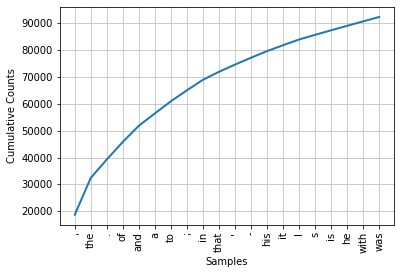

In [ ]:
fdist_text1.plot(20, cumulative=True)
plt.show()

**Do the most frequent types in the text provide meaningful information about its content/purpose/genre? Why or why not? What could be more useful?**

### **Most *Infrequent* Types (Words)** 
A *hapax* is a word that occurs only once in a text. Let's try finding those next to see if they provide more information about the text:

In [ ]:
hapaxes = fdist_text1.hapaxes()
len(hapaxes)
hapaxes[0:36]

**Does examination of the hapaxes provide meaningful information about the content/genre/purpose of the text?**

### **Selection of Types (Words) Based on Condition**


Okay, now maybe we might think that we can find important words in the text based on both their frequency and their length -- ruling out most function words and specifying that words should occur more than once. Maybe we might get more information based on the long words in the text as well. 

Let's set some conditions for our frequency distribution search:

${w | w \space ϵ \space V \space \& \space P(w)}$ → The set of all *w* (words) such that *w* is an element of *V* (vocabulary) and *w* has the property *P*

In [ ]:
vocab = set(text1)

In [ ]:
long_words = [word for word in vocab if len(word) > 15] # What property is this statement satisfying?
sorted(long_words)

**Identify words that are of a certain length and frequency - 2 conditions:**

In [ ]:
freq_content = [word for word in set(text1) if len(word) > 7 and fdist_text1[word] > 13]
freq_content = sorted(freq_content)
len(freq_content)
freq_content[0:25]

['American',
 'Atlantic',
 'Christian',
 'Fedallah',
 'Greenland',
 'Leviathan',
 'Meantime',
 'Meanwhile',
 'Nantucket',
 'Nantucketer',
 'Nevertheless',
 'Queequeg',
 'Starbuck',
 'Steelkilt',
 'Tashtego',
 'according',
 'actually',
 'advancing',
 'afterwards',
 'alongside',
 'altogether',
 'answered',
 'anything',
 'anywhere',
 'attached']

**What, if any, useful information can we glean from the text based on this basic analysis? What are its shortcomings?**

## **Now let's compare multiple texts in corpus on some of these basic text statistics**

Maybe these basic statistics don't mean much in isolation, when only examining one text at a time. But what can we find out by comparing several texts on these metrics?

In [ ]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
for fileid in gutenberg.fileids():
  num_chars = len(gutenberg.raw(fileid))
  num_words = len(gutenberg.words(fileid))
  num_sents = len(gutenberg.sents(fileid))
  num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) #set all words to lowercase to avoid double-counting
  print("Avg word len = ", round(num_chars/num_words),
        "Avg sent len = ", round(num_words/num_sents), 
        "Lex_Div = ", round(num_words/num_vocab,2), 
        "Text:", fileid)  

Avg word len =  5 Avg sent len =  25 Lex_Div =  26 Text: austen-emma.txt
Avg word len =  5 Avg sent len =  26 Lex_Div =  17 Text: austen-persuasion.txt
Avg word len =  5 Avg sent len =  28 Lex_Div =  22 Text: austen-sense.txt
Avg word len =  4 Avg sent len =  34 Lex_Div =  79 Text: bible-kjv.txt
Avg word len =  5 Avg sent len =  19 Lex_Div =  5 Text: blake-poems.txt
Avg word len =  4 Avg sent len =  19 Lex_Div =  14 Text: bryant-stories.txt
Avg word len =  4 Avg sent len =  18 Lex_Div =  12 Text: burgess-busterbrown.txt
Avg word len =  4 Avg sent len =  20 Lex_Div =  13 Text: carroll-alice.txt
Avg word len =  5 Avg sent len =  20 Lex_Div =  12 Text: chesterton-ball.txt
Avg word len =  5 Avg sent len =  23 Lex_Div =  11 Text: chesterton-brown.txt
Avg word len =  5 Avg sent len =  19 Lex_Div =  11 Text: chesterton-thursday.txt
Avg word len =  4 Avg sent len =  21 Lex_Div =  25 Text: edgeworth-parents.txt
Avg word len =  5 Avg sent len =  26 Lex_Div =  15 Text: melville-moby_dick.txt
Avg 

**Let's discuss some observations! What do you notice based on these text statistics across a selection of texts?**

## **Stylistic Comparisons Amongst Text Genres**

We briefly discussed how the Brown corpus has been used to study differences between genres of text, let's examine these differences using our basic text statistics...

In [ ]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = FreqDist(word.lower() for word in news_text) # all words in news_text to lowercase
w_words = ['who', 'what', 'where', 'when', 'why']

for w in w_words:
  print(w + ':', fdist[w], end=' ')


who: 268 what: 95 where: 59 when: 169 why: 14 

#### *Conditional Frequencies*

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres = ['news', 'adventure', 'editorial', 'government', 'humor', 'lore', 'romance']
w_words = ['who', 'what', 'where', 'when', 'why']

cfd.tabulate(conditions = genres, samples = w_words)

              he   him   his   she   her  hers  they  them their 
      news   451    93   399    42   103     0   205    96   219 
 adventure   761   415   776   240   444     1   206   156   156 
 editorial   268   106   244    41    37     1   148    67   124 
government   120    25   141     0     3     0    92    63   174 
     humor   146    48   137    58    62     0    70    49    49 
      lore   541   167   496   232   302     1   303   181   300 
   romance   702   339   559   496   651     3   168   142   114 


**What differences exist amongst the genres as they relate to their frequency of wh-words usage? Are there other meaningful word classes that might distinguish between genres?**

In [ ]:
pronouns = ['he', 'him', 'his', 'she', 'her', 'hers', 'they', 'them', 'their']

### **Stylistic Comparisons Amongsts Texts Over Time**

In addition to investigating static differences in word usage across texts, we can also examine how word use changes over time. One corpus we can use for this are the inaugural address speeches from the `nltk` corpus:

In [ ]:
from matplotlib.pyplot import figure
from nltk.corpus import inaugural

inaugural.fileids()

[fileid[:4] for fileid in inaugural.fileids()]

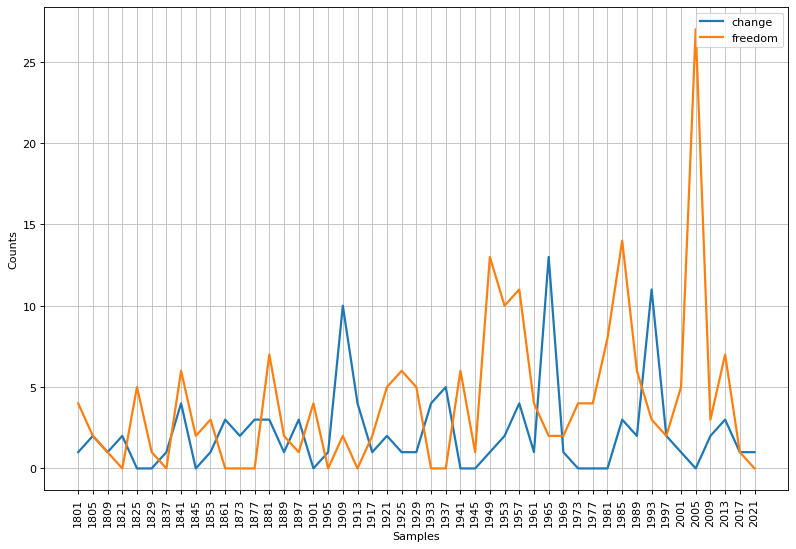

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in ['freedom', 'change']
    if word.lower().startswith(target))
figure(figsize=(12, 8), dpi=80)
cfd.plot()
plt.show()

**What other words might have changed in their usage over time?**